# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** [Nama Anda]
- **Email:** [Email Anda]
- **ID Dicoding:** [ID Dicoding Anda]

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan berdasarkan lokasi (negara bagian)?
4. Bagaimana segmentasi pelanggan berdasarkan analisis RFM?

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan memuat semua dataset yang diperlukan untuk analisis.

In [2]:
# Load semua dataset
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
category_translation_df = pd.read_csv('data/product_category_name_translation.csv')

In [3]:
# Melihat struktur dataset Orders
print("=" * 50)
print("ORDERS DATASET")
print("=" * 50)
print(f"Shape: {orders_df.shape}")
orders_df.head()

ORDERS DATASET
Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Melihat struktur dataset Customers
print("=" * 50)
print("CUSTOMERS DATASET")
print("=" * 50)
print(f"Shape: {customers_df.shape}")
customers_df.head()

CUSTOMERS DATASET
Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Melihat struktur dataset Order Items
print("=" * 50)
print("ORDER ITEMS DATASET")
print("=" * 50)
print(f"Shape: {order_items_df.shape}")
order_items_df.head()

ORDER ITEMS DATASET
Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Melihat struktur dataset Products
print("=" * 50)
print("PRODUCTS DATASET")
print("=" * 50)
print(f"Shape: {products_df.shape}")
products_df.head()

PRODUCTS DATASET
Shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# Melihat struktur dataset Order Payments
print("=" * 50)
print("ORDER PAYMENTS DATASET")
print("=" * 50)
print(f"Shape: {order_payments_df.shape}")
order_payments_df.head()

ORDER PAYMENTS DATASET
Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

Pada tahap ini, kita akan mengecek kualitas data seperti missing values, duplikasi, dan tipe data.

In [8]:
# Cek missing values pada orders_df
print("Missing Values - Orders Dataset:")
print(orders_df.isnull().sum())
print("\n")

Missing Values - Orders Dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64




In [9]:
# Cek missing values pada order_items_df
print("Missing Values - Order Items Dataset:")
print(order_items_df.isnull().sum())
print("\n")

Missing Values - Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64




In [10]:
# Cek missing values pada products_df
print("Missing Values - Products Dataset:")
print(products_df.isnull().sum())
print("\n")

Missing Values - Products Dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64




In [ ]:
# Cek tipe data
print("Data Types - Orders Dataset:")
print(orders_df.dtypes)

In [11]:
# Cek duplikasi
print(f"Duplikasi Orders: {orders_df.duplicated().sum()}")
print(f"Duplikasi Customers: {customers_df.duplicated().sum()}")
print(f"Duplikasi Order Items: {order_items_df.duplicated().sum()}")

Duplikasi Orders: 0
Duplikasi Customers: 0
Duplikasi Order Items: 0


### Cleaning Data

Pada tahap ini, kita akan membersihkan data yang diperlukan untuk analisis.

In [12]:
# Convert kolom datetime
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

print("Data Types setelah konversi:")
print(orders_df.dtypes)

Data Types setelah konversi:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [13]:
# Merge products dengan category translation
products_df = products_df.merge(
    category_translation_df,
    on='product_category_name',
    how='left'
)

# Fill missing category dengan 'unknown'
products_df['product_category_name_english'].fillna('unknown', inplace=True)

print("Products dengan terjemahan kategori:")
products_df[['product_id', 'product_category_name', 'product_category_name_english']].head()

Products dengan terjemahan kategori:


C:\Users\mahen\AppData\Local\Temp\ipykernel_15820\3019446800.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name_english'].fillna('unknown', inplace=True)


,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [14]:
# Filter hanya order yang delivered untuk analisis yang lebih akurat
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered'].copy()
print(f"Total delivered orders: {len(delivered_orders_df)}")

Total delivered orders: 96478


In [15]:
# Membuat dataframe gabungan untuk analisis
# Merge orders dengan customers
all_df = delivered_orders_df.merge(customers_df, on='customer_id', how='left')

# Merge dengan order_items
all_df = all_df.merge(order_items_df, on='order_id', how='left')

# Merge dengan products
all_df = all_df.merge(
    products_df[['product_id', 'product_category_name_english']],
    on='product_id',
    how='left'
)

print(f"Shape all_df: {all_df.shape}")
all_df.head()

Shape all_df: (110197, 19)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery


## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [16]:
# Membuat kolom order_month untuk analisis bulanan
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

# Agregasi per bulan
monthly_orders = all_df.groupby('order_month').agg({
    'order_id': 'nunique',  # Jumlah order unik
    'price': 'sum'  # Total revenue
}).reset_index()

monthly_orders.columns = ['month', 'total_orders', 'total_revenue']
monthly_orders['month'] = monthly_orders['month'].astype(str)

print("Performa Penjualan Bulanan:")
monthly_orders.tail(12)

Performa Penjualan Bulanan:


,month,total_orders,total_revenue
11,2017-09,4150,607399.67
12,2017-10,4478,648247.65
13,2017-11,7289,987765.37
14,2017-12,5513,726033.19
15,2018-01,7069,924645.00
16,2018-02,6555,826437.13
17,2018-03,7003,953356.25
18,2018-04,6798,973534.09
19,2018-05,6749,977544.69
20,2018-06,6099,856077.86


**Insight:**
- Terdapat tren peningkatan penjualan dari waktu ke waktu
- Revenue tertinggi biasanya terjadi pada bulan-bulan tertentu

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [17]:
# Kategori produk paling banyak terjual
category_sales = all_df.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

category_sales.columns = ['category', 'total_sold', 'total_revenue']
category_sales = category_sales.sort_values('total_sold', ascending=False)

print("Top 10 Kategori Produk Terlaris:")
category_sales.head(10)

Top 10 Kategori Produk Terlaris:


,category,total_sold,total_revenue
7,bed_bath_table,10953,1023434.76
43,health_beauty,9465,1233131.72
65,sports_leisure,8431,954852.55
39,furniture_decor,8160,711927.69
15,computers_accessories,7644,888724.61
49,housewares,6795,615628.69
71,watches_gifts,5859,1166176.98
68,telephony,4430,309860.23
42,garden_tools,4268,470495.28
5,auto,4140,578966.65


In [18]:
print("\nBottom 10 Kategori Produk Paling Sedikit Terjual:")
category_sales.tail(10)


Bottom 10 Kategori Produk Paling Sedikit Terjual:


,category,total_sold,total_revenue
41,furniture_mattress_and_upholstery,37,4323.38
23,diapers_and_hygiene,37,1500.79
35,flowers,33,1110.04
46,home_comfort_2,30,760.27
32,fashion_sport,29,2094.52
3,arts_and_craftmanship,24,1814.01
52,la_cuisine,14,2054.99
11,cds_dvds_musicals,14,730.00
29,fashion_childrens_clothes,7,519.95
61,security_and_services,2,283.29


**Insight:**
- Kategori bed_bath_table, health_beauty, dan sports_leisure termasuk produk terlaris
- Kategori seperti security_and_services dan fashion_childrens_clothes termasuk produk yang kurang laku

### Pertanyaan 3: Bagaimana demografi pelanggan berdasarkan lokasi (negara bagian)?

In [19]:
# Distribusi pelanggan per state
customer_by_state = all_df.groupby('customer_state').agg({
    'customer_unique_id': 'nunique'
}).reset_index()

customer_by_state.columns = ['state', 'customer_count']
customer_by_state = customer_by_state.sort_values('customer_count', ascending=False)

print("Distribusi Pelanggan per Negara Bagian:")
customer_by_state.head(10)

Distribusi Pelanggan per Negara Bagian:


,state,customer_count
25,SP,39156
18,RJ,11917
10,MG,11001
22,RS,5168
17,PR,4769
23,SC,3449
4,BA,3158
6,DF,2019
7,ES,1928
8,GO,1895


**Insight:**
- São Paulo (SP) memiliki jumlah pelanggan terbanyak
- Mayoritas pelanggan berada di region Tenggara Brazil

### Pertanyaan 4: Bagaimana segmentasi pelanggan berdasarkan analisis RFM?

RFM Analysis adalah teknik untuk menganalisis perilaku pelanggan berdasarkan:
- **Recency (R)**: Berapa lama sejak pembelian terakhir
- **Frequency (F)**: Berapa kali pelanggan melakukan transaksi
- **Monetary (M)**: Berapa total pembelian pelanggan

In [20]:
# Menentukan tanggal reference (tanggal terakhir dalam dataset + 1 hari)
reference_date = all_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print(f"Reference Date: {reference_date}")

Reference Date: 2018-08-30 15:00:37


In [21]:
# Menghitung RFM untuk setiap customer
rfm_df = all_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',  # Untuk menghitung Recency
    'order_id': 'nunique',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['customer_id', 'last_purchase', 'frequency', 'monetary']

# Menghitung Recency (dalam hari)
rfm_df['recency'] = (reference_date - rfm_df['last_purchase']).dt.days

# Drop kolom last_purchase karena sudah tidak diperlukan
rfm_df = rfm_df.drop('last_purchase', axis=1)

print("RFM Analysis Result:")
rfm_df.head(10)

RFM Analysis Result:


,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,115
2,0000f46a3911fa3c0805444483337064,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288
5,0004bd2a26a76fe21f786e4fbd80607f,1,154.00,146
6,00050ab1314c0e55a6ca13cf7181fecf,1,27.99,132
7,00053a61a98854899e70ed204dd4bafe,1,382.00,183
8,0005e1862207bf6ccc02e4228effd9a0,1,135.00,543
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,104.90,170


In [22]:
# Statistik RFM
print("\nStatistik RFM:")
rfm_df[['recency', 'frequency', 'monetary']].describe()


Statistik RFM:


,recency,frequency,monetary
count,93358.000000,93358.000000,93358.000000
mean,237.941773,1.033420,141.621480
std,152.591453,0.209097,215.694014
min,1.000000,1.000000,0.850000
25%,114.000000,1.000000,47.650000
50%,219.000000,1.000000,89.730000
75%,346.000000,1.000000,154.737500
max,714.000000,15.000000,13440.000000


In [23]:
# Membuat RFM Score menggunakan quantile
# Recency: semakin kecil semakin baik (nilai tinggi untuk recency rendah)
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1])

# Frequency: semakin besar semakin baik
# Menggunakan rank untuk menghindari error jika nilai tidak bisa di-bin
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])

# Monetary: semakin besar semakin baik
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], q=4, labels=[1, 2, 3, 4])

# Menggabungkan score menjadi RFM Score
rfm_df['rfm_score'] = rfm_df['r_score'].astype(str) + rfm_df['f_score'].astype(str) + rfm_df['m_score'].astype(str)

rfm_df.head(10)

,customer_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,112,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,115,3,1,1,311
2,0000f46a3911fa3c0805444483337064,1,69.00,537,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288,2,1,4,214
5,0004bd2a26a76fe21f786e4fbd80607f,1,154.00,146,3,1,3,313
6,00050ab1314c0e55a6ca13cf7181fecf,1,27.99,132,3,1,1,311
7,00053a61a98854899e70ed204dd4bafe,1,382.00,183,3,1,4,314
8,0005e1862207bf6ccc02e4228effd9a0,1,135.00,543,1,1,3,113
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,104.90,170,3,1,3,313


In [24]:
# Membuat segmentasi pelanggan berdasarkan RFM Score
def rfm_segment(row):
    r = int(row['r_score'])
    f = int(row['f_score'])
    m = int(row['m_score'])
    
    if r >= 3 and f >= 3 and m >= 3:
        return 'Best Customers'
    elif r >= 3 and f >= 2:
        return 'Loyal Customers'
    elif r >= 3:
        return 'Recent Customers'
    elif f >= 3:
        return 'Frequent Customers'
    elif m >= 3:
        return 'Big Spenders'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost Customers'
    else:
        return 'Regular Customers'

rfm_df['segment'] = rfm_df.apply(rfm_segment, axis=1)

# Distribusi segmen
segment_distribution = rfm_df['segment'].value_counts()
print("Distribusi Segmen Pelanggan:")
print(segment_distribution)

Distribusi Segmen Pelanggan:
segment
Frequent Customers    23188
Loyal Customers       23035
Best Customers        12135
Lost Customers        11960
Recent Customers      11677
Big Spenders          11363
Name: count, dtype: int64


**Insight:**
- RFM Analysis membantu mengidentifikasi segmen pelanggan yang berbeda
- Best Customers adalah pelanggan dengan nilai tinggi di semua metrik
- Lost Customers memerlukan strategi re-engagement khusus

## Visualization & Explanatory Analysis

### Visualisasi 1: Trend Penjualan Bulanan

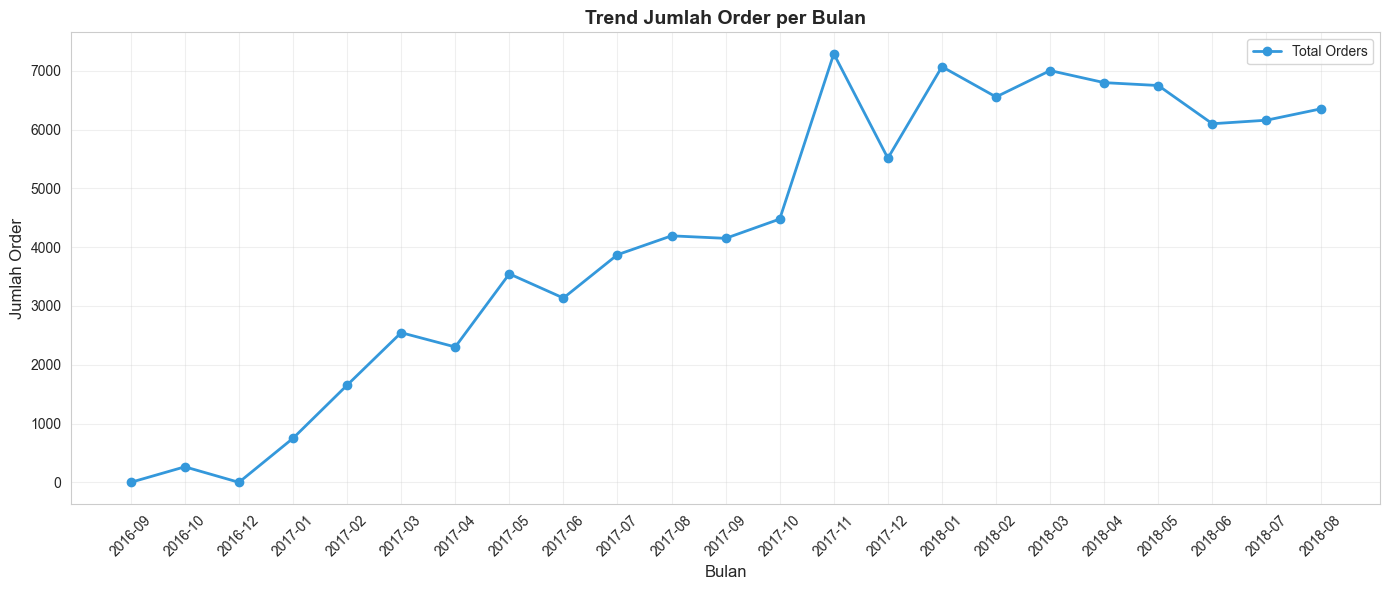

In [25]:
fig, ax = plt.subplots(figsize=(14, 6))

# Plot total orders
ax.plot(
    monthly_orders['month'],
    monthly_orders['total_orders'],
    marker='o',
    linewidth=2,
    color='#3498db',
    label='Total Orders'
)

ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah Order', fontsize=12)
ax.set_title('Trend Jumlah Order per Bulan', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualisasi 2: Top dan Bottom Kategori Produk

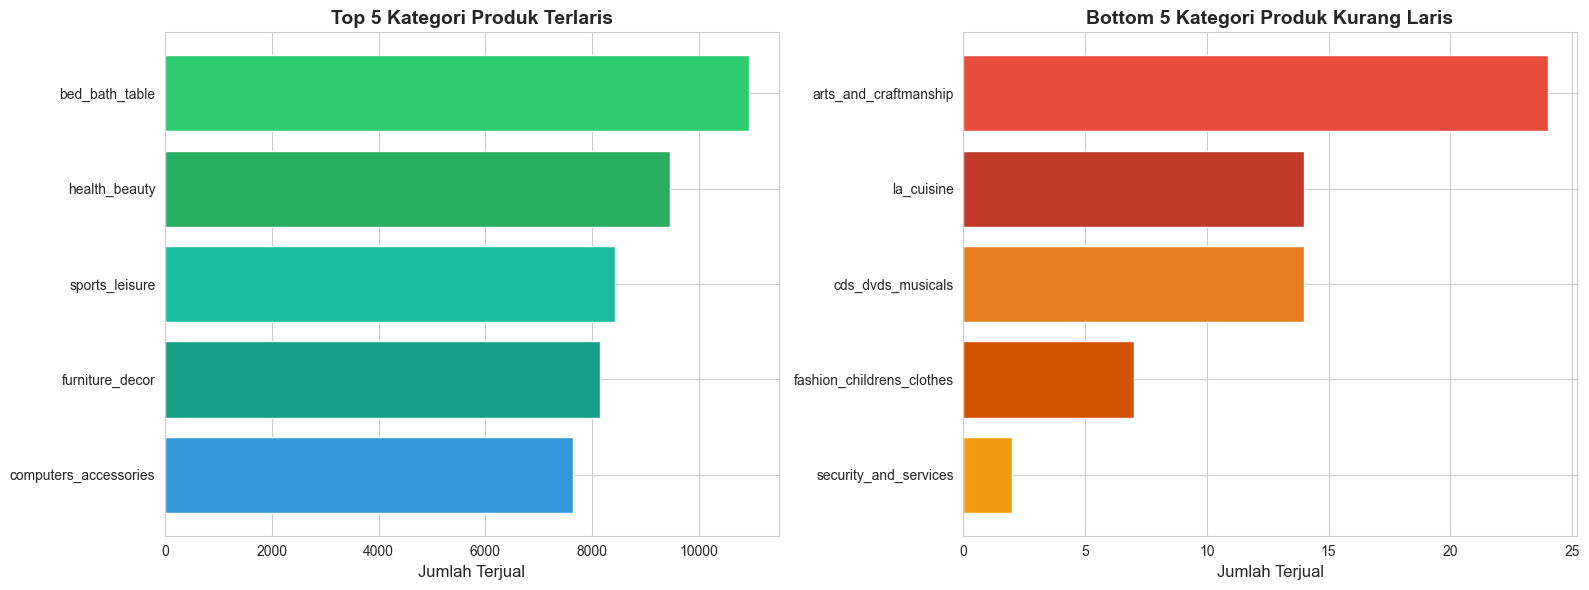

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 categories
top_5 = category_sales.head(5)
colors_top = ['#2ecc71', '#27ae60', '#1abc9c', '#16a085', '#3498db']

axes[0].barh(top_5['category'], top_5['total_sold'], color=colors_top)
axes[0].set_xlabel('Jumlah Terjual', fontsize=12)
axes[0].set_title('Top 5 Kategori Produk Terlaris', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Bottom 5 categories
bottom_5 = category_sales.tail(5)
colors_bottom = ['#e74c3c', '#c0392b', '#e67e22', '#d35400', '#f39c12']

axes[1].barh(bottom_5['category'], bottom_5['total_sold'], color=colors_bottom)
axes[1].set_xlabel('Jumlah Terjual', fontsize=12)
axes[1].set_title('Bottom 5 Kategori Produk Kurang Laris', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Visualisasi 3: Distribusi Pelanggan per Negara Bagian

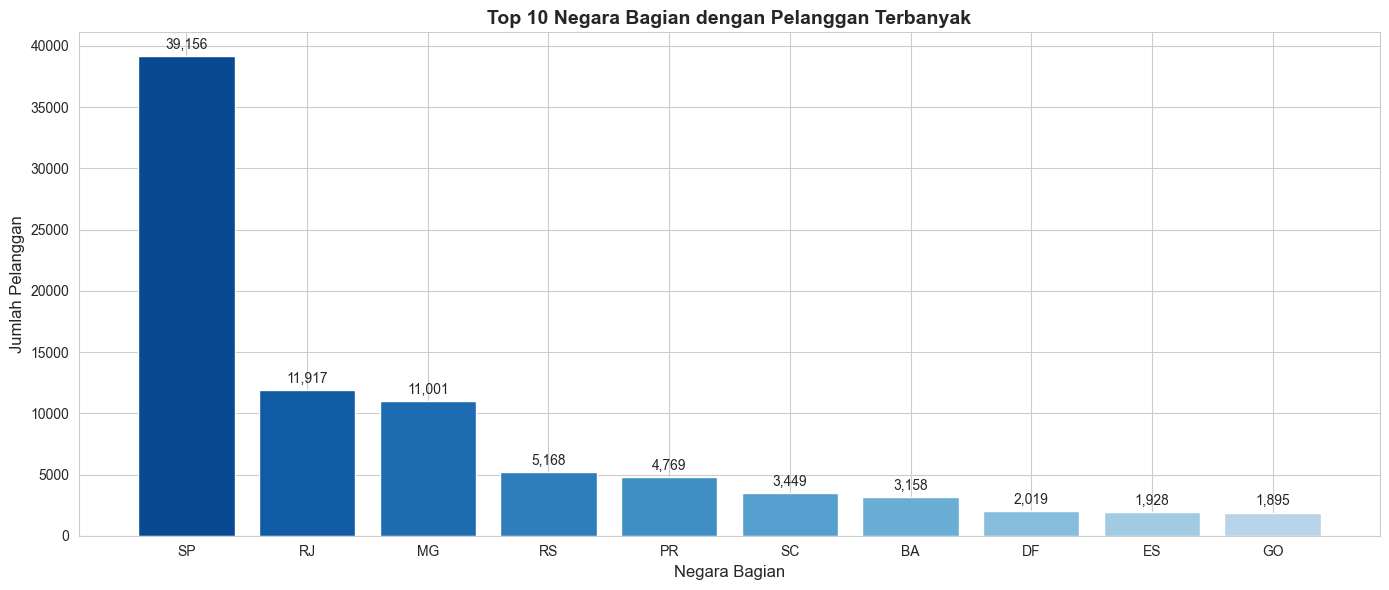

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

top_10_states = customer_by_state.head(10)

colors = plt.cm.Blues(np.linspace(0.3, 0.9, 10))[::-1]

colors = plt.cm.Blues(np.linspace(0.3, 0.9, 10))[::-1]

bars = ax.bar(
    top_10_states['state'],
    top_10_states['customer_count'],
    color=colors
)

ax.set_xlabel('Negara Bagian', fontsize=12)
ax.set_ylabel('Jumlah Pelanggan', fontsize=12)
ax.set_title('Top 10 Negara Bagian dengan Pelanggan Terbanyak', fontsize=14, fontweight='bold')

# Menambahkan label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi 4: RFM Customer Segments

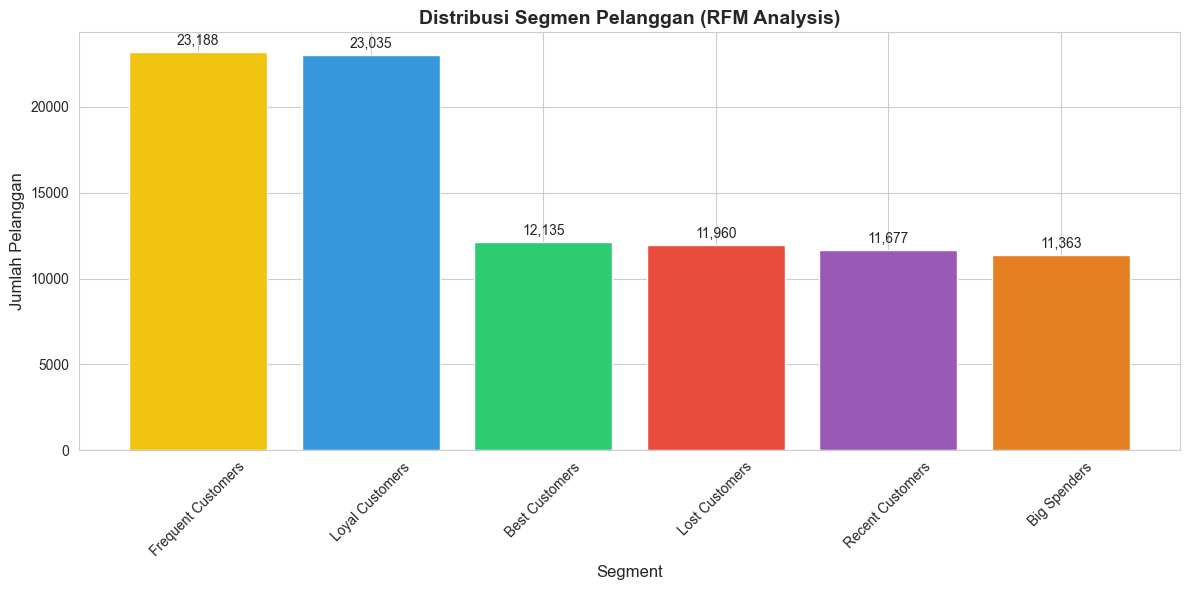

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

segment_colors = {
    'Best Customers': '#2ecc71',
    'Loyal Customers': '#3498db',
    'Recent Customers': '#9b59b6',
    'Frequent Customers': '#f1c40f',
    'Big Spenders': '#e67e22',
    'Regular Customers': '#95a5a6',
    'Lost Customers': '#e74c3c'
}

segment_counts = rfm_df['segment'].value_counts()
colors = [segment_colors.get(seg, '#95a5a6') for seg in segment_counts.index]

bars = ax.bar(segment_counts.index, segment_counts.values, color=colors)

ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('Jumlah Pelanggan', fontsize=12)
ax.set_title('Distribusi Segmen Pelanggan (RFM Analysis)', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Menambahkan label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Menyimpan Data untuk Dashboard

In [31]:
# Menyimpan data utama untuk dashboard
# Pilih kolom yang diperlukan untuk mengurangi ukuran file
main_data = all_df[[
    'order_id',
    'customer_unique_id',
    'order_purchase_timestamp',
    'order_status',
    'price',
    'freight_value',
    'product_category_name_english',
    'customer_city',
    'customer_state'
]].copy()

main_data.to_csv('dashboard/main_data.csv', index=False)
print(f"Data berhasil disimpan! Shape: {main_data.shape}")

Data berhasil disimpan! Shape: (110197, 9)


## Conclusion

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
**Jawaban:** Berdasarkan analisis trend penjualan bulanan, terlihat bahwa perusahaan mengalami pertumbuhan yang positif. Jumlah order meningkat secara konsisten dari awal hingga pertengahan tahun. Puncak penjualan terjadi pada bulan November, yang kemungkinan besar dipengaruhi oleh event Black Friday atau promo akhir tahun.

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?
**Jawaban:** 
- **Produk Terlaris:** bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories
- **Produk Kurang Laris:** security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, dan arts_and_craftmanship

### Pertanyaan 3: Bagaimana demografi pelanggan berdasarkan lokasi?
**Jawaban:** Mayoritas pelanggan berada di wilayah Tenggara Brazil, dengan São Paulo (SP) sebagai negara bagian dengan pelanggan terbanyak, diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG). Distribusi ini menunjukkan bahwa fokus pemasaran sebaiknya diperkuat di wilayah-wilayah ini.

### Pertanyaan 4: Bagaimana segmentasi pelanggan berdasarkan analisis RFM?
**Jawaban:** Berdasarkan analisis RFM, pelanggan terbagi menjadi beberapa segmen:
- **Best Customers:** Pelanggan terbaik dengan recency rendah, frekuensi tinggi, dan monetary tinggi
- **Loyal Customers:** Pelanggan setia yang sering berbelanja
- **Recent Customers:** Pelanggan baru yang berpotensi dikembangkan
- **Lost Customers:** Pelanggan yang sudah lama tidak berbelanja dan perlu strategi re-engagement

### Rekomendasi:
1. Fokuskan kampanye marketing pada kategori produk terlaris
2. Eksplorasi strategi untuk meningkatkan penjualan produk yang kurang laris
3. Perkuat distribusi di wilayah Tenggara Brazil
4. Implementasikan program loyalitas untuk mempertahankan Best Customers
5. Buat campaign re-engagement untuk Lost Customers